In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, classification_report, recall_score, precision_score,f1_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LassoCV, LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, KNeighborsTransformer
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from joblib import dump, load

# Regression Problem:

In [132]:
covid_ds=pd.read_csv(r"C:\Users\sagis\Desktop\קורס בינה מאכותית\פרוייקטים\פרוייקט SL\Covid19_With_GDP_Values.csv")
covid_ds

Unnamed: 0      Country/Region        Date Province/State  Confirmed  \
0             0         Afghanistan  2021-01-01              0    52513.0   
1             1         Afghanistan  2022-01-01              0   158107.0   
2             2             Albania  2021-01-01              0    58316.0   
3             3             Albania  2022-01-01              0   210224.0   
4             4             Algeria  2021-01-01              0    99897.0   
..          ...                 ...         ...            ...        ...   
335         335  West Bank and Gaza  2022-01-01              0   469748.0   
336         336              Zambia  2021-01-01              0    20997.0   
337         337              Zambia  2022-01-01              0   257948.0   
338         338            Zimbabwe  2021-01-01              0    14084.0   
339         339            Zimbabwe  2022-01-01              0   214214.0   

     Deaths  Recovered           GDP  Unemployment           CPI  
0    2201.0    41727.0  1.426650e+10        11.934           NaN  
1    7356.0        0.0  1.450216e+10        14.100           NaN  
2    1181.0    33634.0  1.793057e+10        12.473    123.448662  
3    3217.0        0.0  1.891638e+10        11.588    131.750835  
4    2762.0    67395.0  1.862654e+11        13.607    166.218895  
..      ...        ...           ...           ...           ...  
335  4919.0        0.0  1.916550e+10        24.420    117.301113  
336   390.0    18773.0  2.209642e+10         5.195    299.818966  
337  3740.0        0.0  2.916378e+10         5.993    332.778677  
338   369.0    11347.0  2.837124e+10         9.540   5411.002445  
339  5017.0        0.0  2.736663e+10        10.087  11076.601788  

[340 rows x 10 columns]

## Functions:

In [3]:
##function that prints the model's error values
def print_error (y_test, pred, y):
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    p_mae=mae*100/y.mean()
    p_rmse=rmse*100/y.mean()
    print(f"MAE: {mae} --> {p_mae}%")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse} --> {p_rmse}%")
        

In [4]:
##Returns the MAE value
def get_mae(y_test, pred):
    return mean_absolute_error(y_test, pred)

In [5]:
##Returns the RMSE value.
def get_rmse(y_test, pred):
    mse = mean_squared_error(y_test, pred)
    return np.sqrt(mse)

## Data preparation:

In [133]:
#1
#removing unknown column - "Unnamed: 0"
#removing uncritical columns - "Province/State"- have no direct impact on the label.
#grouping every country into one row by: summig the confirmed, deaths and recovered, and meaning the GDP, unemployment and CPI.

covid_ds=covid_ds.drop(["Unnamed: 0","Province/State"], axis=1)
sum_cols = ["Confirmed", "Deaths", "Recovered"]
mean_cols = ["GDP", "Unemployment", "CPI"]

grouped_df = covid_ds.groupby('Country/Region')[sum_cols].sum()
for col in mean_cols:
    grouped_df[col] = covid_ds.groupby('Country/Region')[col].mean()

covid_ds=grouped_df.copy()
covid_ds

Confirmed  Deaths  Recovered           GDP  Unemployment  \
Country/Region                                                                 
Afghanistan          210620.0  9557.0    41727.0  1.438433e+10       13.0170   
Albania              268540.0  4398.0    33634.0  1.842347e+10       12.0305   
Algeria              318715.0  9046.0    67395.0  2.059128e+11       13.0220   
Andorra               31857.0   224.0     7463.0  3.352643e+09       12.4370   
Angola                99966.0  2177.0    11146.0  8.545244e+10       15.2460   
...                       ...     ...        ...           ...           ...   
Uzbekistan           276212.0  2099.0    75244.0  7.537072e+10        4.9400   
Vanuatu                   8.0     1.0        1.0  9.863067e+08        4.9525   
West Bank and Gaza   608971.0  6337.0   118926.0  1.863725e+10       25.4050   
Zambia               278945.0  4130.0    18773.0  2.563010e+10        5.5940   
Zimbabwe             228298.0  5386.0    11347.0  2.786893e+10        9.8135   

                            CPI  
Country/Region                   
Afghanistan                 NaN  
Albania              127.599748  
Algeria              173.919413  
Andorra              181.619932  
Angola               645.998608  
...                         ...  
Uzbekistan           375.337755  
Vanuatu              130.479616  
West Bank and Gaza   115.185995  
Zambia               316.298821  
Zimbabwe            8243.802116  

[170 rows x 6 columns]

In [134]:
#2
#missing values checking
covid_ds.isnull().sum()

Confirmed       0
Deaths          0
Recovered       0
GDP             0
Unemployment    0
CPI             1
dtype: int64

In [135]:
#2
#only 1 rows with a missing value only in the CPI column, which is not critical and is therefore deleted.
covid_ds.dropna(inplace=True)
print(len(covid_ds))

169


In [136]:
#3
#duplicate rows checking
covid_ds.duplicated().sum()

0

In [152]:
covid_ds_copy = covid_ds.copy()

## Data exploration: 

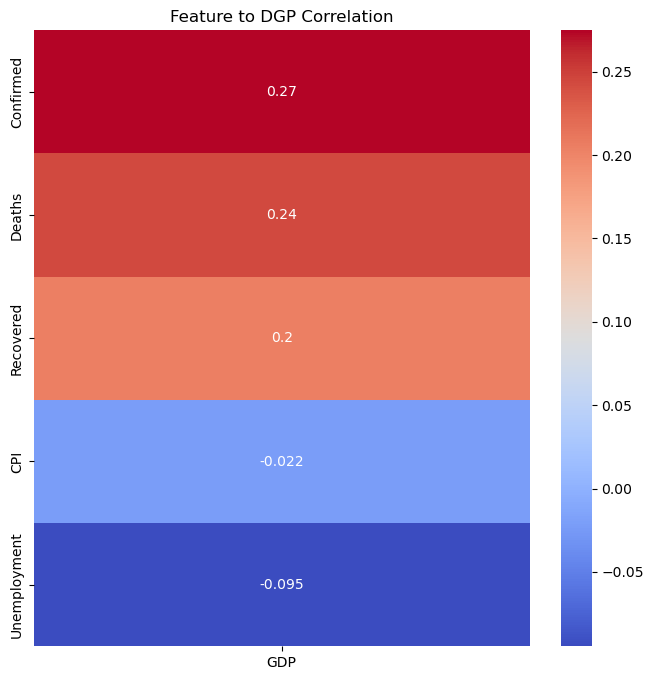

In [153]:
#checks correlation between features and the label
covid_numbers=covid_ds_copy.select_dtypes(include=["number","boolean"])
correlation_to_label = pd.DataFrame(covid_numbers.corr()["GDP"].drop("GDP").sort_values(ascending=False))
plt.figure(figsize=(8,8))
sns.heatmap(correlation_to_label, annot=True, cmap="coolwarm")
plt.title("Feature to DGP Correlation")
plt.show()

##### We see a correlation between GDP and the death and confirmed rate, the connection is probably related to the level of panic among citizens, which caused less use of the local economy.

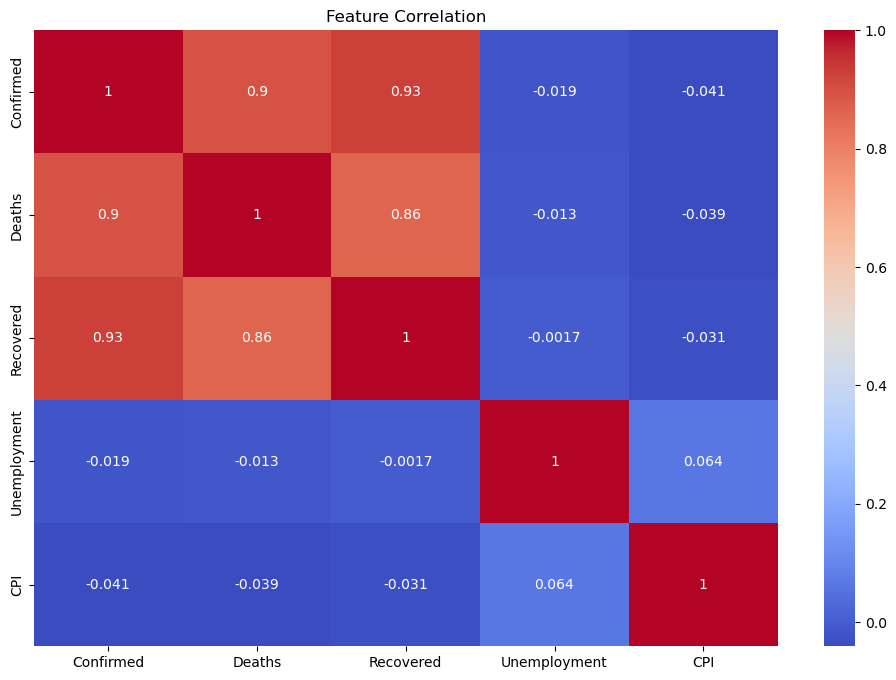

In [154]:
#checks correlation between the features
feature_correlations = covid_numbers.corr().drop("GDP",axis=0).drop("GDP",axis=1)
plt.figure(figsize=(12,8))
sns.heatmap(feature_correlations, annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

##### We found a clear correlation between the number of confirmed cases and the number of deaths,
##### this makes sense because the more confirmed cases there are, the more deaths are likely to occur as a result of the disease.
##### we can see also conection between the number of confirmed cases and the number of recoverd because the recovers are people who
##### for sure were once confirmed as sick.

## Feature scaling for all models:

In [157]:
##Because GDP values vary wildly across countries, models tend to focus on large economies,
##leading to disproportionately large errors for smaller ones.
## Therefor - GDP will become log value of itself
X=covid_ds_copy.drop("GDP",axis=1)
y=np.log(covid_ds_copy["GDP"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [158]:
##standartization
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

## Vanilla Linear Regression:

In [159]:
## cross validation on linear regression
linear_model = LinearRegression()
linear_scores = cross_validate(linear_model,scaled_X_train,y_train,scoring=["neg_mean_squared_error","neg_mean_absolute_error"], cv=5)
scores_df=pd.DataFrame(linear_scores)
scores_df

fit_time  score_time  test_neg_mean_squared_error  \
0  0.001994    0.002992                    -4.036231   
1  0.002994    0.001994                    -3.381565   
2  0.009974    0.002991                    -4.234904   
3  0.003990    0.002992                   -13.871129   
4  0.001994    0.003998                    -2.518925   

   test_neg_mean_absolute_error  
0                     -1.358652  
1                     -1.422411  
2                     -1.535208  
3                     -2.188299  
4                     -1.330894

In [160]:
## the model have no optimal values
## traning the model and finding betas
linear_model.fit(scaled_X_train, y_train)
linear_model.coef_

array([ 2.01690189,  0.1279717 , -1.08435821, -0.5113595 ,  0.04128641])

In [161]:
## mean error score - in log units
linear_predictions = linear_model.predict(scaled_X_test)
print_error(y_test,linear_predictions,y)

MAE: 1.8140477587036916 --> 7.420576559712548%
MSE: 5.69180194356784
RMSE: 2.385749765496759 --> 9.75919112506491%


## RidgeCV Regression:

In [162]:
##finding the best alpha value, training the model and printing the chosen alpha
ridge_cv_model = RidgeCV(alphas=(0.1,1,10,100,1000), scoring="neg_mean_absolute_error")
ridge_cv_model.fit(scaled_X_train, y_train)
ridge_cv_model.alpha_

10.0

In [163]:
## the model's betas
ridge_cv_model.coef_

array([ 1.20232038,  0.232193  , -0.40659702, -0.4762139 ,  0.02689899])

In [164]:
## mean error score - in log units
ridge_cv_predictions = ridge_cv_model.predict(scaled_X_test)
print_error(y_test,ridge_cv_predictions,y)

MAE: 1.7649162393281204 --> 7.219598278257624%
MSE: 5.271926462850489
RMSE: 2.296067608510361 --> 9.392335672244151%


## LassoCV Regression:

In [165]:
##finding the best alpha value, training the model and printing the betas
lasso_cv_model= LassoCV(eps=0.1, n_alphas=100)
lasso_cv_model.fit(scaled_X_train, y_train)
lasso_cv_model.coef_

C:\Users\sagis\anaconda3_1\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1613: FutureWarning: 'n_alphas' was deprecated in 1.7 and will be removed in 1.9. 'alphas' now accepts an integer value which removes the need to pass 'n_alphas'. The default value of 'alphas' will change from None to 100 in 1.9. Pass an explicit value to 'alphas' and leave 'n_alphas' to its default value to silence this warning.
  warnings.warn(


array([ 0.6879047,  0.       ,  0.       , -0.0678856, -0.       ])

In [166]:
## the best alpha from the range it calculated
lasso_cv_model.alpha_

0.4469033824221863

In [167]:
## mean error score - in log units
lasso_cv_predictions = lasso_cv_model.predict(scaled_X_test)
print_error(y_test,lasso_cv_predictions,y)

MAE: 1.801121489910809 --> 7.367700130881616%
MSE: 5.134906973304771
RMSE: 2.266033312487875 --> 9.2694768379149%


## Polynomial Regression:

In [168]:
## making an array of MAE for each degree
error_array=[]
for degree_i in range (1,5):
    polynomial_data=PolynomialFeatures(degree=degree_i, include_bias= False)
    
    X_train_poly = polynomial_data.fit_transform(scaled_X_train)
    X_test_poly = polynomial_data.transform(scaled_X_test)
    
    polynomial_model = LinearRegression()
    polynomial_model.fit(X_train_poly, y_train)
    polynomial_predictions=polynomial_model.predict(X_test_poly)
    
    error_array.append(get_mae(y_test,polynomial_predictions))

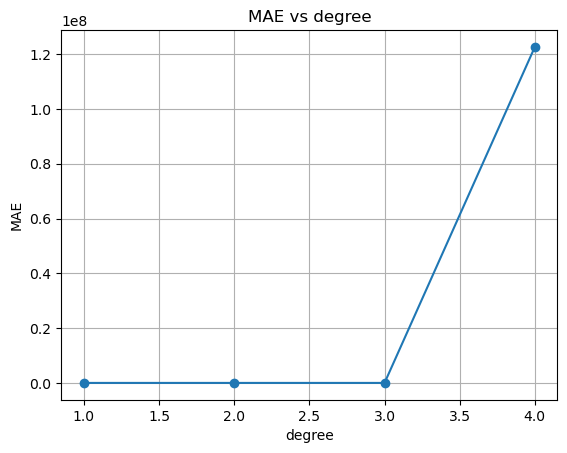

In [169]:
## plot of MAE for each degree
plt.plot(range(1,5), error_array, marker='o')
plt.xlabel("degree")
plt.ylabel("MAE")
plt.title("MAE vs degree")
plt.grid(True)
plt.show()

#### according to the graph, degree 1 is the optimal

In [170]:
## training for degree 1
polynomial_data=PolynomialFeatures(degree=1, include_bias= False)
X_train_poly = polynomial_data.fit_transform(scaled_X_train)
X_test_poly = polynomial_data.transform(scaled_X_test)
polynomial_model = LinearRegression()
polynomial_model.fit(X_train_poly, y_train)
polynomial_predictions=polynomial_model.predict(X_test_poly)
print_error(y_test,polynomial_predictions,y)

MAE: 1.814047758703691 --> 7.420576559712545%
MSE: 5.691801943567827
RMSE: 2.3857497654967563 --> 9.759191125064898%


## Models comparing and axporting:

In [171]:
## set of error values for the models
models = ["Linear", "RidgeCV", "LassoCV", "Polinomial"]
mae_scores = [get_mae(y_test, linear_predictions),get_mae(y_test, ridge_cv_predictions),
              get_mae(y_test, lasso_cv_predictions),get_mae(y_test, polynomial_predictions)]
rmse_scores = [get_rmse(y_test, linear_predictions),get_rmse(y_test, ridge_cv_predictions),
              get_rmse(y_test, lasso_cv_predictions),get_rmse(y_test, polynomial_predictions)]

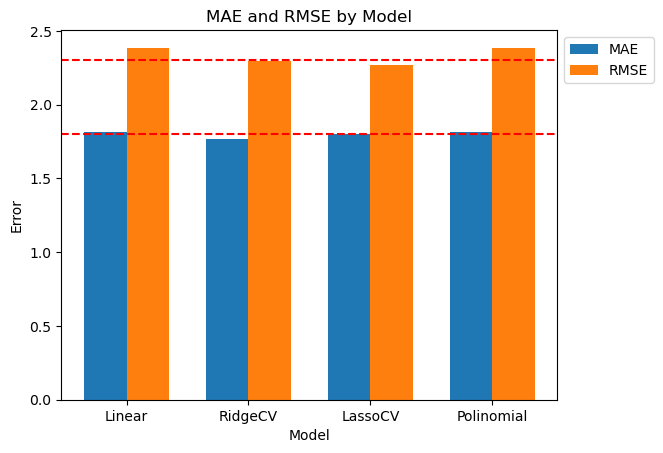

In [175]:
## bar plot of errors for model
x = np.arange(len(models))
width = 0.35
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, mae_scores, width, label='MAE')
bars2 = ax.bar(x + width/2, rmse_scores, width, label='RMSE')
ax.set_xlabel('Model')
ax.set_ylabel('Error')
ax.set_title('MAE and RMSE by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(bbox_to_anchor=(1,1))
plt.axhline(y=1.8, color="r",ls="--")
plt.axhline(y=2.3, color="r",ls="--")

plt.show()

##### we can see that RidgeCV model is with the less error among all models

In [178]:
## training RigdeCV on all the data
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
ridge_cv_model_final = RidgeCV(alphas=10, scoring="neg_mean_absolute_error")
ridge_cv_model_final.fit(X, y)

RidgeCV(alphas=10, scoring='neg_mean_absolute_error')

In [179]:
## exporting the scaler and the model
dump(scaler, "final_scaler.joblib")
dump (ridge_cv_model_final,"final_ridge_cv_model.joblib")

['final_ridge_cv_model.joblib']

In [180]:
## importing the scaler and the model
loaded_scaler = load (r"C:\Users\sagis\final_scaler.joblib")
loaded_model = load (r"C:\Users\sagis\final_ridge_cv_model.joblib")

In [181]:
loaded_model.coef_

array([ 3.98140401e-07,  6.94618211e-06, -1.42748468e-06, -8.10351768e-02,
        6.56887189e-05])

# Classification Problem:

In [12]:
customer_ds=pd.read_csv(r"C:\Users\sagis\Desktop\קורס בינה מאכותית\פרוייקטים\פרוייקט SL\customer_churn_dataset.csv")
customer_ds

CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0               1   22  Female      25               14              4   
1               2   41  Female      28               28              7   
2               3   47    Male      27               10              2   
3               4   35    Male       9               12              5   
4               5   53  Female      58               24              9   
...           ...  ...     ...     ...              ...            ...   
64369       64370   45  Female      33               12              6   
64370       64371   37    Male       6                1              5   
64371       64372   25    Male      39               14              8   
64372       64373   50  Female      18               19              7   
64373       64374   52  Female      45               15              9   

       Payment Delay Subscription Type Contract Length  Total Spend  \
0                 27             Basic         Monthly          598   
1                 13          Standard         Monthly          584   
2                 29           Premium          Annual          757   
3                 17           Premium       Quarterly          232   
4                  2          Standard          Annual          533   
...              ...               ...             ...          ...   
64369             21             Basic       Quarterly          947   
64370             22          Standard          Annual          923   
64371             30           Premium         Monthly          327   
64372             22          Standard         Monthly          540   
64373             25          Standard         Monthly          696   

       Last Interaction  Churn  
0                     9      1  
1                    20      0  
2                    21      0  
3                    18      0  
4                    18      0  
...                 ...    ...  
64369                14      1  
64370                 9      1  
64371                20      1  
64372                13      1  
64373                22      1  

[64374 rows x 12 columns]

## Functions:

In [14]:
##Returns the accuracy score 
def get_accuracy (y_test, y_pred):
    return accuracy_score(y_test, y_pred)

In [15]:
##Returns the recall score 
def get_recall (y_test, y_pred):
    return recall_score(y_test, y_pred)

In [16]:
##Returns the f1 score 
def get_f1 (y_test, y_pred):
    return f1_score(y_test, y_pred)

In [40]:
## prints accuracy,recall and f1 scores and shows the mosel's confusion matrix
def print_model_info (y_test, y_pred):
    print(f"Accuracy = {get_accuracy(y_test, y_pred)}")
    print()
    print(f"Recall = {get_recall(y_test, y_pred)}")
    print()
    print(f"F1_score = {get_f1(y_test, y_pred)}")
    print()
    
    cm = confusion_matrix(y_test, y_pred)
    cmap = plt.cm.viridis
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

## Data Preparation:

In [18]:
##removing unknown column - "CustomerID"
customer_ds=customer_ds.drop(["CustomerID"],axis=1)

In [19]:
#missing values checking
customer_ds.isnull().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [20]:
#duplicate rows checking
customer_ds.duplicated().sum()

0

In [21]:
##checking which groups are in each categorial column
customer_ds_unique =customer_ds[["Gender","Subscription Type","Contract Length","Churn"]]
for column in customer_ds_unique.columns:
    customer_ds_unique[column]=pd.Series(customer_ds_unique[column].unique())
customer_ds_unique.head(5)    

C:\Users\sagis\AppData\Local\Temp\ipykernel_8324\4263823221.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_ds_unique[column]=pd.Series(customer_ds_unique[column].unique())


Gender Subscription Type Contract Length  Churn
0  Female             Basic         Monthly    1.0
1    Male          Standard          Annual    0.0
2     NaN           Premium       Quarterly    NaN
3     NaN               NaN             NaN    NaN
4     NaN               NaN             NaN    NaN

In [22]:
## converting the categirial columns into boolean
customer_ds=pd.get_dummies(customer_ds)
customer_ds.head()

Age  Tenure  Usage Frequency  Support Calls  Payment Delay  Total Spend  \
0   22      25               14              4             27          598   
1   41      28               28              7             13          584   
2   47      27               10              2             29          757   
3   35       9               12              5             17          232   
4   53      58               24              9              2          533   

   Last Interaction  Churn  Gender_Female  Gender_Male  \
0                 9      1           True        False   
1                20      0           True        False   
2                21      0          False         True   
3                18      0          False         True   
4                18      0           True        False   

   Subscription Type_Basic  Subscription Type_Premium  \
0                     True                      False   
1                    False                      False   
2                    False                       True   
3                    False                       True   
4                    False                      False   

   Subscription Type_Standard  Contract Length_Annual  \
0                       False                   False   
1                        True                   False   
2                       False                    True   
3                       False                   False   
4                        True                    True   

   Contract Length_Monthly  Contract Length_Quarterly  
0                     True                      False  
1                     True                      False  
2                    False                      False  
3                    False                       True  
4                    False                      False

In [23]:
customer_ds_copy=customer_ds.copy()

## Data exploration: 

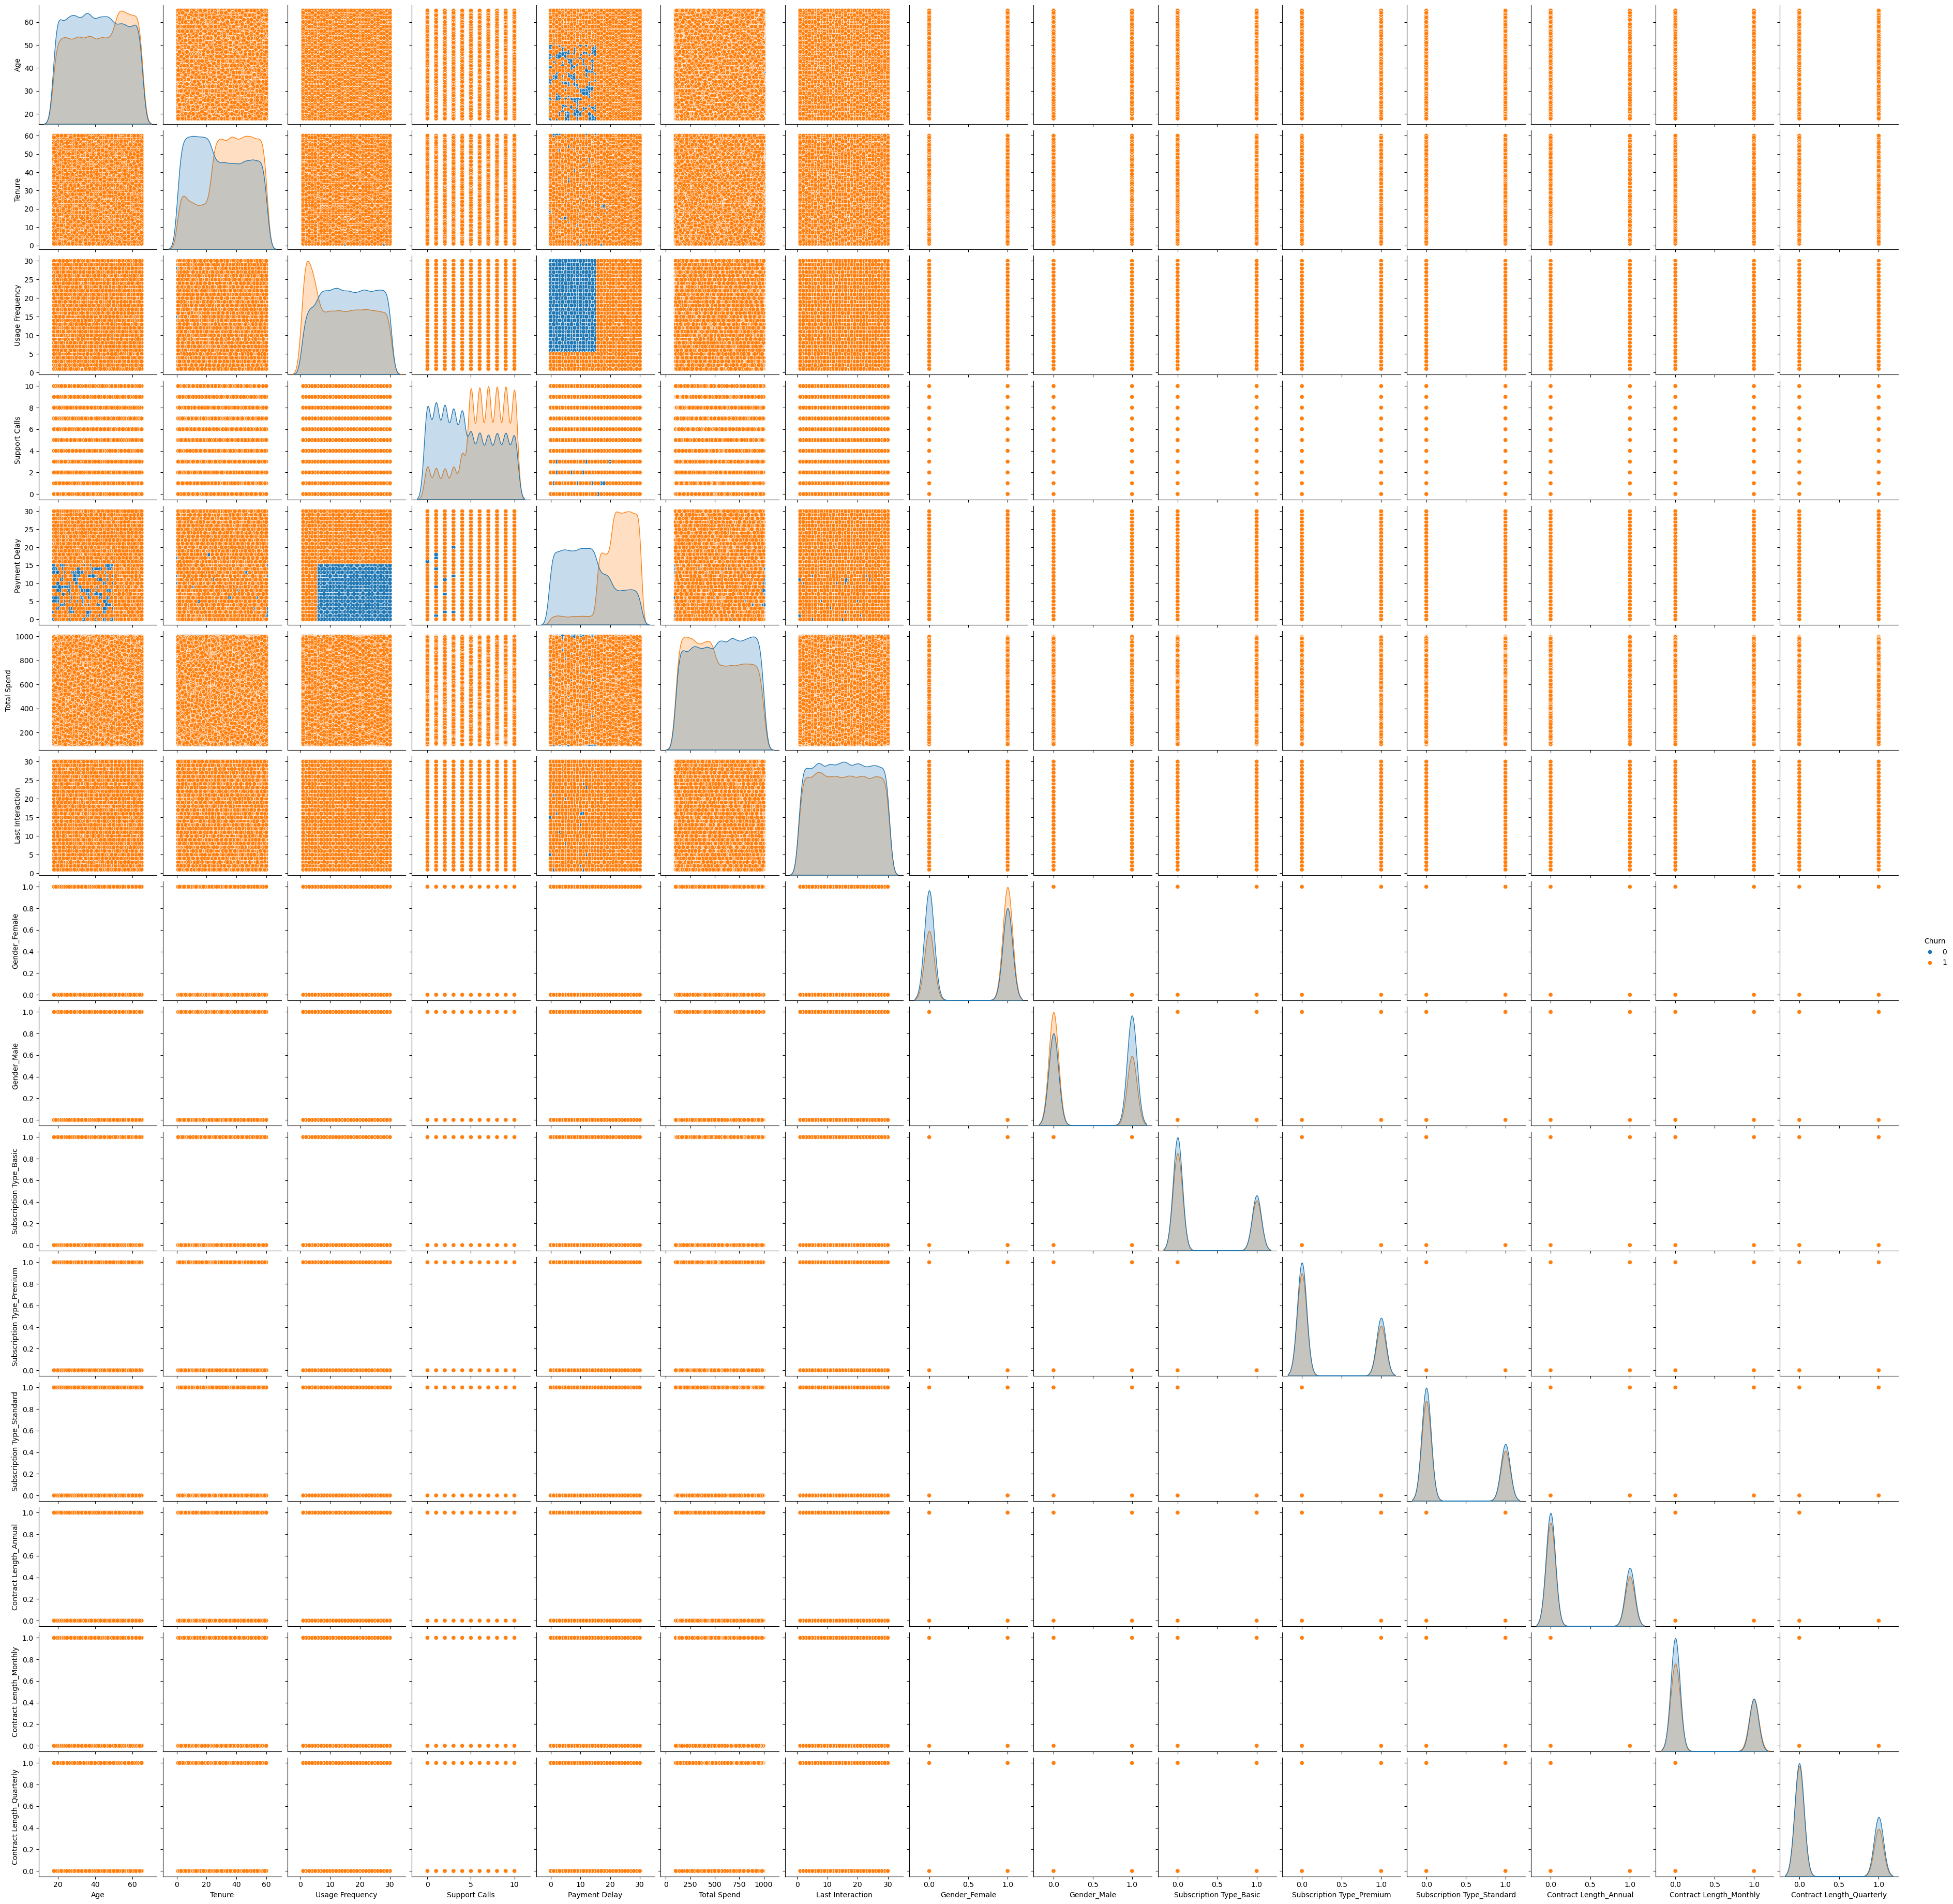

In [311]:
##pairplot of correlation between features and between features and label
sns.pairplot(customer_ds_copy, hue="Churn")
plt.show()

## Feature scaling for all models:

In [24]:
##standartization
X=customer_ds_copy.drop(["Churn"],axis=1)
y=customer_ds_copy["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

## Logistic Regression:

In [25]:
## finding optimal parameters using grid search
logistic_model = LogisticRegression()
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "max_iter":[50,100,150]}
grid_search = GridSearchCV(logistic_model, param_grid, scoring='accuracy')
grid_search.fit(scaled_X_train, y_train)

C:\Users\sagis\anaconda3_1\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sagis\anaconda3_1\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sagis\anaconda3_1\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sagis\anaconda3_1\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1210, in fit
    s

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [50, 100, 150], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [26]:
grid_search.best_params_

{'C': 0.01, 'max_iter': 50, 'penalty': 'l2'}

In [27]:
## training the model with the parameters found to be most ideal
logistic_model_optimal=LogisticRegression(C=0.01,max_iter=50,penalty="l2")
logistic_model_optimal.fit(scaled_X_train, y_train)

LogisticRegression(C=0.01, max_iter=50)

In [28]:
## the calculated probability of being included in each of the groups for the test rows
y_proba=logistic_model_optimal.predict_proba(scaled_X_test)
y_proba

array([[0.98391361, 0.01608639],
       [0.9953432 , 0.0046568 ],
       [0.14913558, 0.85086442],
       ...,
       [0.76238314, 0.23761686],
       [0.11206525, 0.88793475],
       [0.08074653, 0.91925347]])

Accuracy = 0.8291306373945011

Recall = 0.8266695718487853

F1_score = 0.8213899112361983



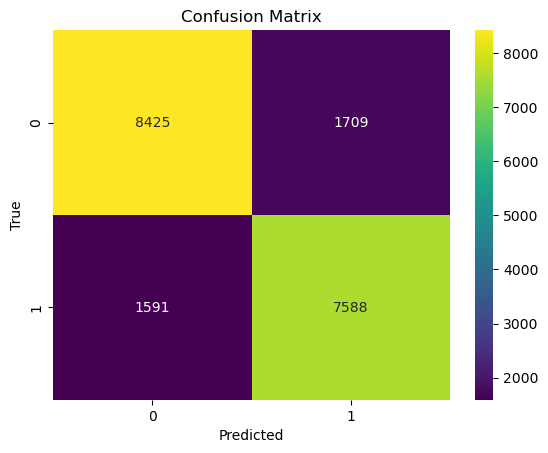

In [29]:
## accuracy values for the model
logistic_prediction= logistic_model_optimal.predict(scaled_X_test)
print_model_info(y_test,logistic_prediction)

## KNN:

In [45]:
## finding the ideal K value using the elbow method
test_error_rates = []

for k in range(1, 10):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    y_pred_test = knn_model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_error_rates.append(test_error)

print(test_error_rates)
    

[0.11924610366074662, 0.1279966861699373, 0.1020038316160099, 0.09874178014808677, 0.09304613472790346, 0.08885206855485939, 0.08957696888106459, 0.08517578832910477, 0.08890384714958832]


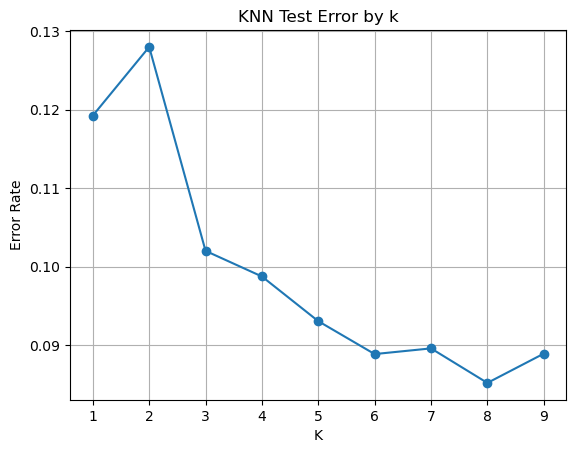

In [88]:
plt.plot(range(1, 10), test_error_rates, marker='o')
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.title("KNN Test Error by k")
plt.grid(True)
plt.show()

##### It seems that the first K value where the errors stabilize is 6

In [47]:
## training the model with k=6
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(scaled_X_train, y_train)
knn_predictions = knn_model.predict(scaled_X_test)

Accuracy = 0.9111479314451406

Recall = 0.8995533282492646

F1_score = 0.9058694459681843



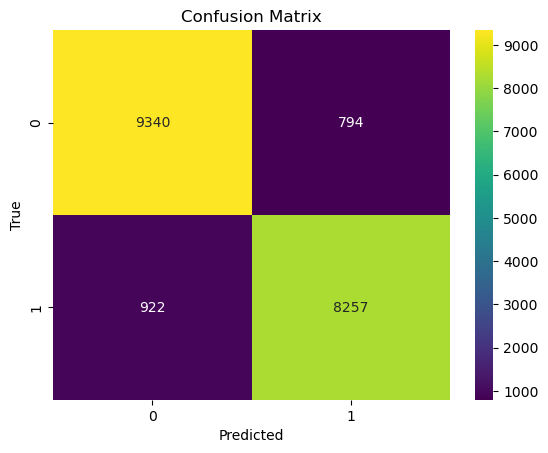

In [48]:
## accuracy values for the model
print_model_info(y_test,knn_predictions)

## SVM:

In [34]:
## finding optimal parameters using grid search
param_grid={
    "C":[1,2,3,4,5,6],
    "kernel":["linear","rbf"]}
svc_model=SVC()
grid_search = GridSearchCV(svc_model, param_grid, scoring='accuracy')
grid_search.fit(scaled_X_train, y_train)
grid_search.best_params_

{'C': 6, 'kernel': 'rbf'}

In [37]:
## training the model with the parameters found to be most ideal
svc_model_optimal=SVC(C=6 , kernel="rbf")
svc_model_optimal.fit(scaled_X_train, y_train)

SVC(C=6)

Accuracy = 0.947341169160669

Recall = 0.9575117115154156

F1_score = 0.9453078784619522



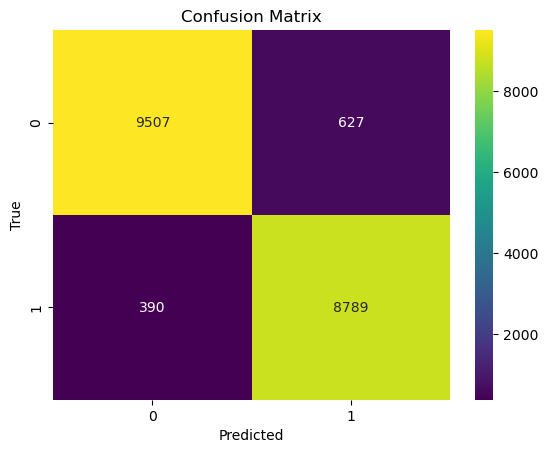

In [41]:
## accuracy values for the model
svc_predictions=svc_model_optimal.predict(scaled_X_test)
print_model_info(y_test,svc_predictions) 

## Random Forest:

In [30]:
## finding optimal parameters using grid search
forest_param_grid = {
    "n_estimators": [100, 200],
    "max_features": ["sqrt", "log2"],
    "bootstrap":[True, False],
    "max_depth": [None, 10, 20],
    "min_samples_split": [10, 20, 50],
    "min_samples_leaf": [20,30,40],
}

random_forest_model=RandomForestClassifier(oob_score=True)
forest_grid_search=GridSearchCV(random_forest_model, forest_param_grid)
forest_grid_search.fit(X_train, y_train)

C:\Users\sagis\anaconda3_1\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sagis\anaconda3_1\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sagis\anaconda3_1\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sagis\anaconda3_1\Lib\site-packages\sklearn\ensemble\_forest.py", line 447, in fit
    raise

GridSearchCV(estimator=RandomForestClassifier(oob_score=True),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [20, 30, 40],
                         'min_samples_split': [10, 20, 50],
                         'n_estimators': [100, 200]})

In [31]:
forest_grid_search.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 20,
 'min_samples_split': 20,
 'n_estimators': 200}

In [32]:
## training the model with the parameters found to be most ideal
random_forest_model_optimal=RandomForestClassifier(bootstrap=True,max_depth=20, max_features="sqrt",
                                                   min_samples_leaf=20, min_samples_split=20, n_estimators=200,
                                                   oob_score=True)
random_forest_model_optimal.fit(X_train, y_train)
forest_predictions=random_forest_model_optimal.predict(X_test)

Accuracy = 0.9962719411795163

Recall = 0.9933543959036932

F1_score = 0.9960672929866725



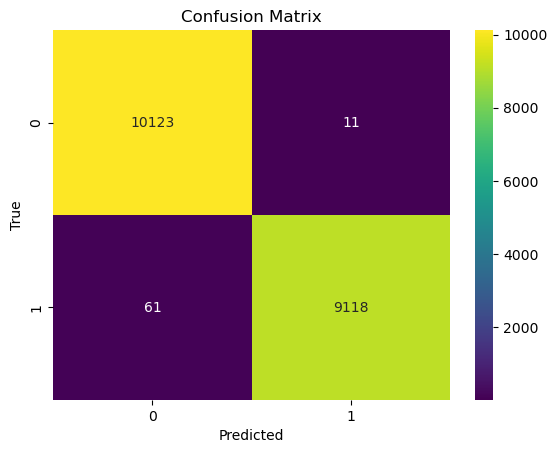

In [33]:
## accuracy values for the model
print_model_info(y_test, forest_predictions)

## Models comparing and axporting:

In [49]:
## set of accuracy values for the models
models = ["Logistic Regression", "KNN", "SVM", "Random Forest"]
accuracy_scores = [get_accuracy(y_test,logistic_prediction),get_accuracy(y_test,knn_predictions),
                  get_accuracy(y_test,svc_predictions),get_accuracy(y_test,forest_predictions)]
recall_scores = [get_recall(y_test,logistic_prediction),get_recall(y_test,knn_predictions),
                  get_recall(y_test,svc_predictions),get_recall(y_test,forest_predictions)]
f1_scores = [get_f1(y_test,logistic_prediction),get_f1(y_test,knn_predictions),
                  get_f1(y_test,svc_predictions),get_f1(y_test,forest_predictions)]

In [52]:
##creating a data frame with all model's accuracy values
models_error_df=pd.DataFrame(
    {"Model": models,
    "Accuracy": accuracy_scores,
    "Recall": recall_scores,
    "F1 Score": f1_scores})
models_error_df.set_index(["Model"], inplace=True)

In [53]:
models_error_df

Accuracy    Recall  F1 Score
Model                                            
Logistic Regression  0.829131  0.826670  0.821390
KNN                  0.911148  0.899553  0.905869
SVM                  0.947341  0.957512  0.945308
Random Forest        0.996272  0.993354  0.996067

##### we found that Random Forest has the best results

In [55]:
## training Random Forest with all the data
random_forest_model_final=RandomForestClassifier(bootstrap=True,max_depth=20, max_features="sqrt",
                                                   min_samples_leaf=20, min_samples_split=20, n_estimators=200,
                                                   oob_score=True)
random_forest_model_final.fit(X,y)

RandomForestClassifier(max_depth=20, min_samples_leaf=20, min_samples_split=20,
                       n_estimators=200, oob_score=True)

In [56]:
## exporting the model
dump(random_forest_model_final, "random_forest_model_final.boblib")

['random_forest_model_final.boblib']

In [57]:
## importing the model
load(r"C:\Users\sagis\random_forest_model_final.boblib")

RandomForestClassifier(max_depth=20, min_samples_leaf=20, min_samples_split=20,
                       n_estimators=200, oob_score=True)